Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

# Regression Problem:

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


load top 10 data sets

In [4]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,11-03-2018,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,04-03-2018,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,25-02-2018,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,18-02-2018,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,11-02-2018,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


last 10 data sets

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

above is the list of all columns

In [6]:
df.shape

(18249, 14)

we have 18249 rows and 14 columns

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

some columns are object type and somes columns are numerical data type

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Datasets does not contain any missing values.Lets see it with visualization

<AxesSubplot:>

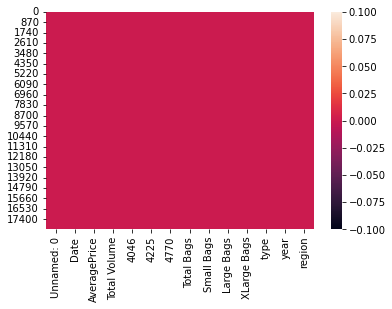

In [9]:
sns.heatmap(df.isnull())

In [10]:
#Let' drop the column which is not required for further analysis
df.drop(columns='Unnamed: 0', inplace =True) 

In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

number of unique values present in our datasets

In [13]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Better better visuliazation lets change the format of date column.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

In [15]:
df['year']=df['Date'].dt.year

In [16]:
df['Date']=df['month'].astype(str)+"-"+df['year'].astype(str)

In [17]:
df['Date']

0        12-2015
1        12-2015
2        12-2015
3         6-2015
4        11-2015
          ...   
18244     4-2018
18245     1-2018
18246     1-2018
18247     1-2018
18248     7-2018
Name: Date, Length: 18249, dtype: object

In [18]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4
18245,1-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [19]:
#dropping the column Date as it is not required for further analysis 
df.drop(columns='Date', inplace =True) 

# Encoding:

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

#data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
#we can perform the above step if we more than one type of avacado's in our data


df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['year']=oe.fit_transform(df['year'].values.reshape(-1,1))

now data sets are all numeric format

# Let's do some Visualization:

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

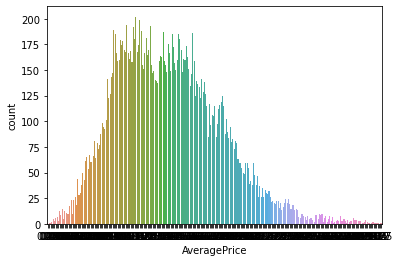

In [21]:
#Printing the AveragePrice with countplot

sns.countplot(data=df,x='AveragePrice')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

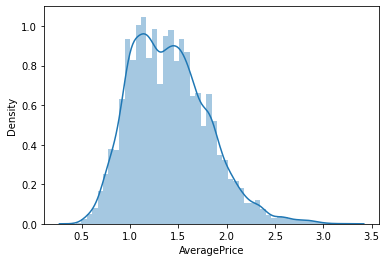

In [22]:
#It is quite normally distributed but not perfectly distributed we will solve it through skewness

sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice'>

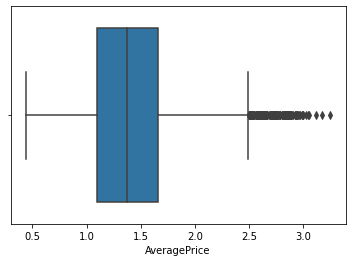

In [23]:
#Printing the column with boxplot & we can clearly see there are outlier in the column

sns.boxplot(data=df,x='AveragePrice')

<AxesSubplot:xlabel='AveragePrice'>

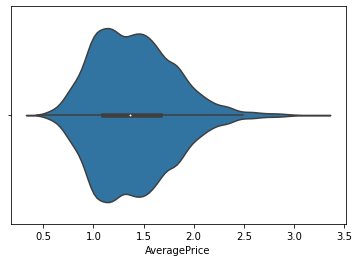

In [24]:
#We can clearly see that the plot is more concentrated towards 1.0 to 2.0

sns.violinplot(df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

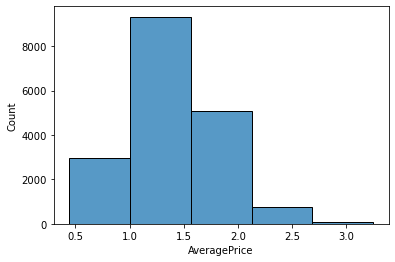

In [25]:
#From 1.0 to 1.5 it is on the highest on count

sns.histplot(df['AveragePrice'],bins=5)

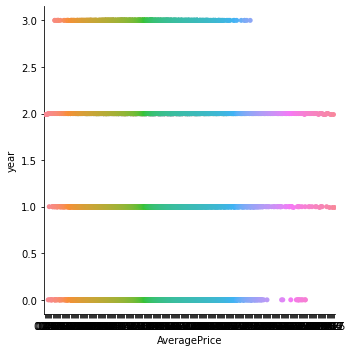

In [26]:
#Plotting catplot of AveragePrice & Year with the help of seaborn library
#We can see that their is increase in 2017 in the AveragePrice while comparing to 2018

sns.catplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

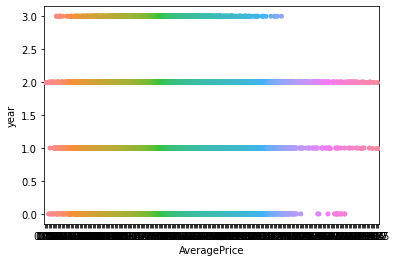

In [27]:
#Plotting it with stripplot

sns.stripplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

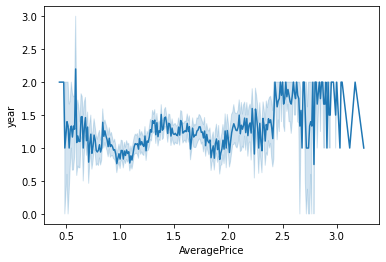

In [28]:
#Plotting lineplot with AveragePrice & Year 

sns.lineplot(x='AveragePrice',y='year',data=df)

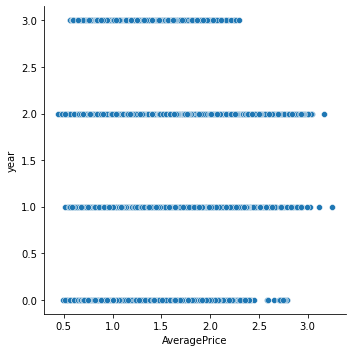

In [29]:
#Plotting relational plot with AveragePrice & Year

sns.relplot('AveragePrice','year',data=df)

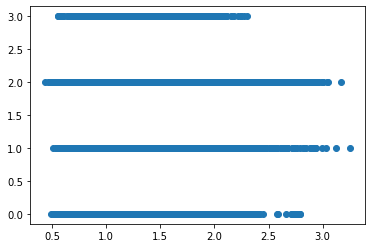

In [30]:
#Plotting the Scatter plot with aveargeprice & year

plt.scatter(df['AveragePrice'],df['year'])
plt.show()

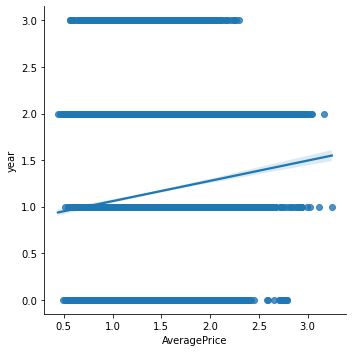

In [31]:
#Plotting lmplot with the variables AveragePrice & Year
#It shows the +ve relationship b/w them

sns.lmplot('AveragePrice','year',data=df)

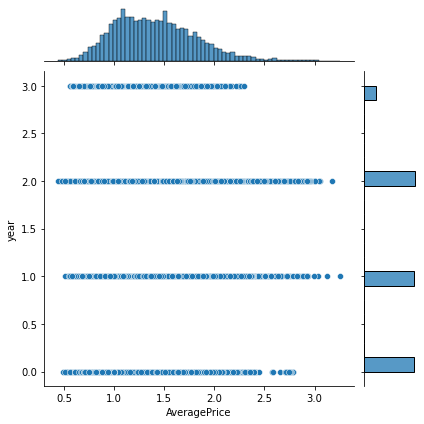

In [32]:
#Plotting jointplot of AveragePrice & Year

sns.jointplot(x=df['AveragePrice'],y=df['year'],data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

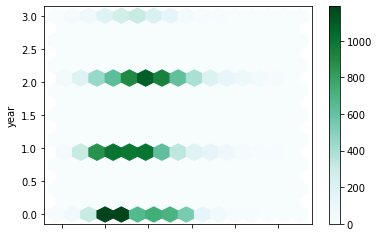

In [33]:
#Plotting the hexagonal shape with AveragePrice & Year

df.plot.hexbin(x='AveragePrice', y='year', gridsize=15)

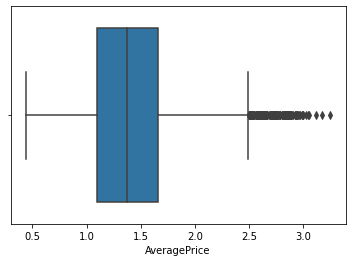

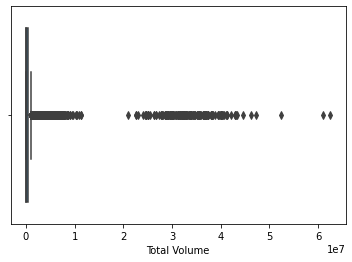

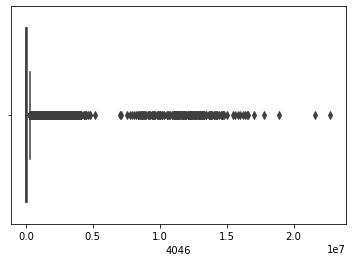

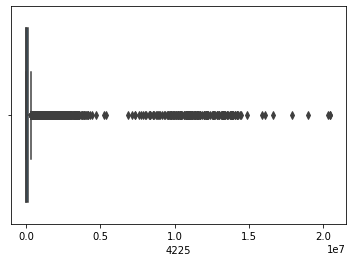

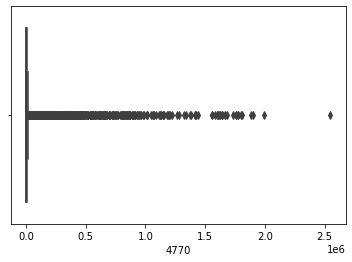

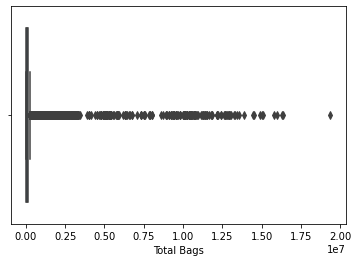

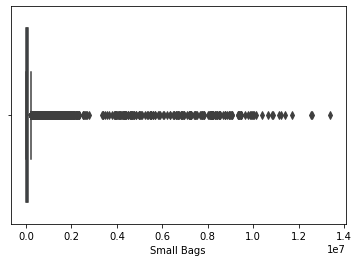

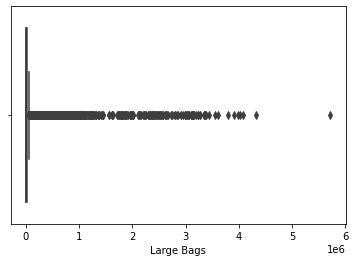

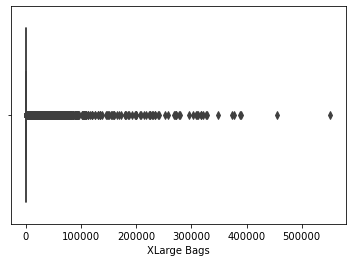

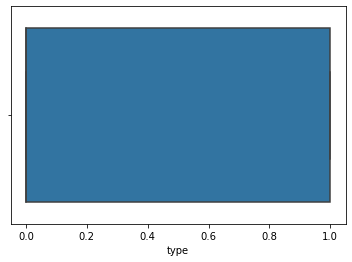

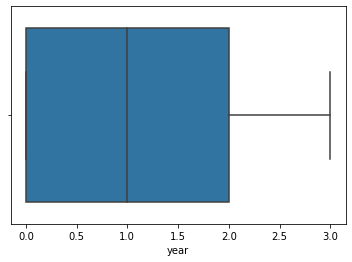

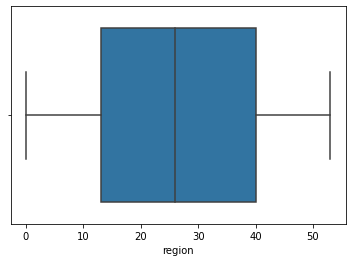

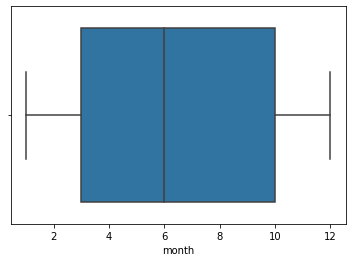

In [34]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.show()

outliers are present in our data sets

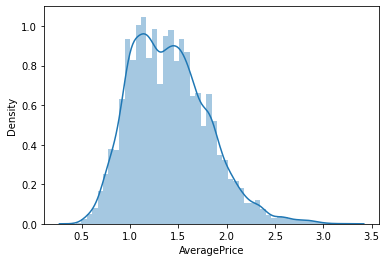

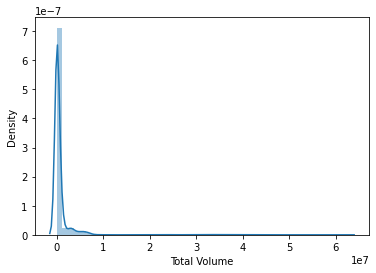

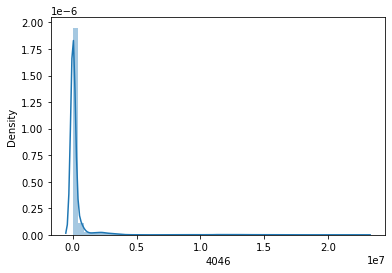

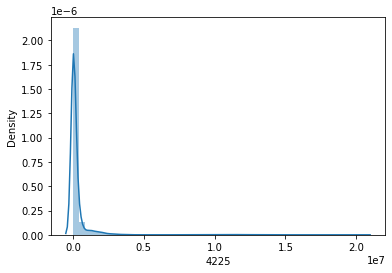

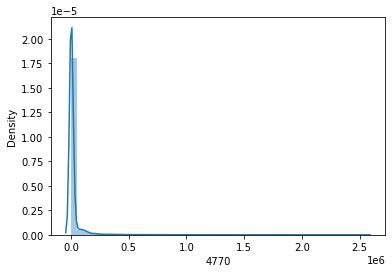

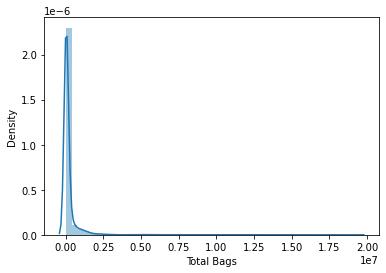

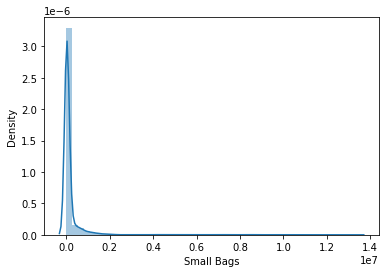

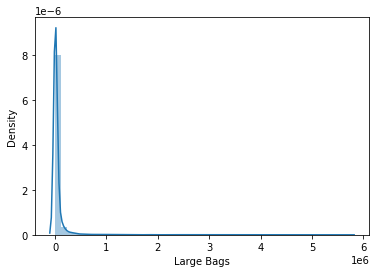

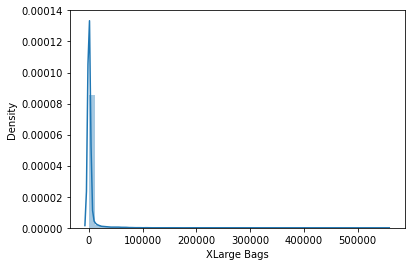

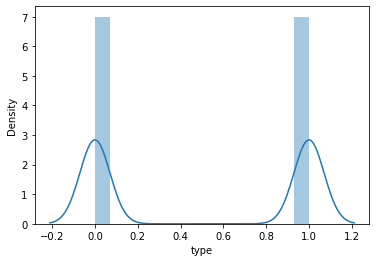

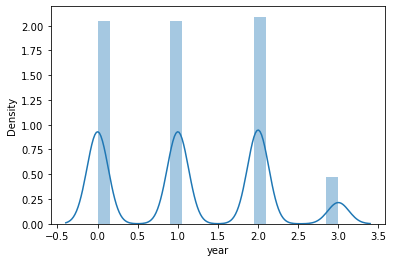

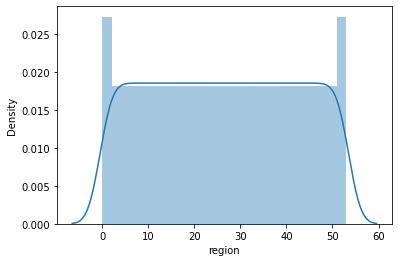

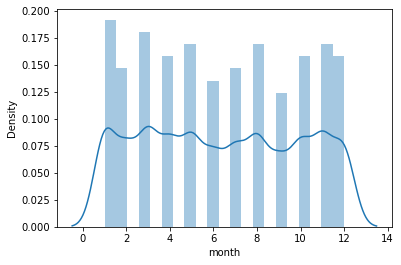

In [35]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

skewness has present in our datasets

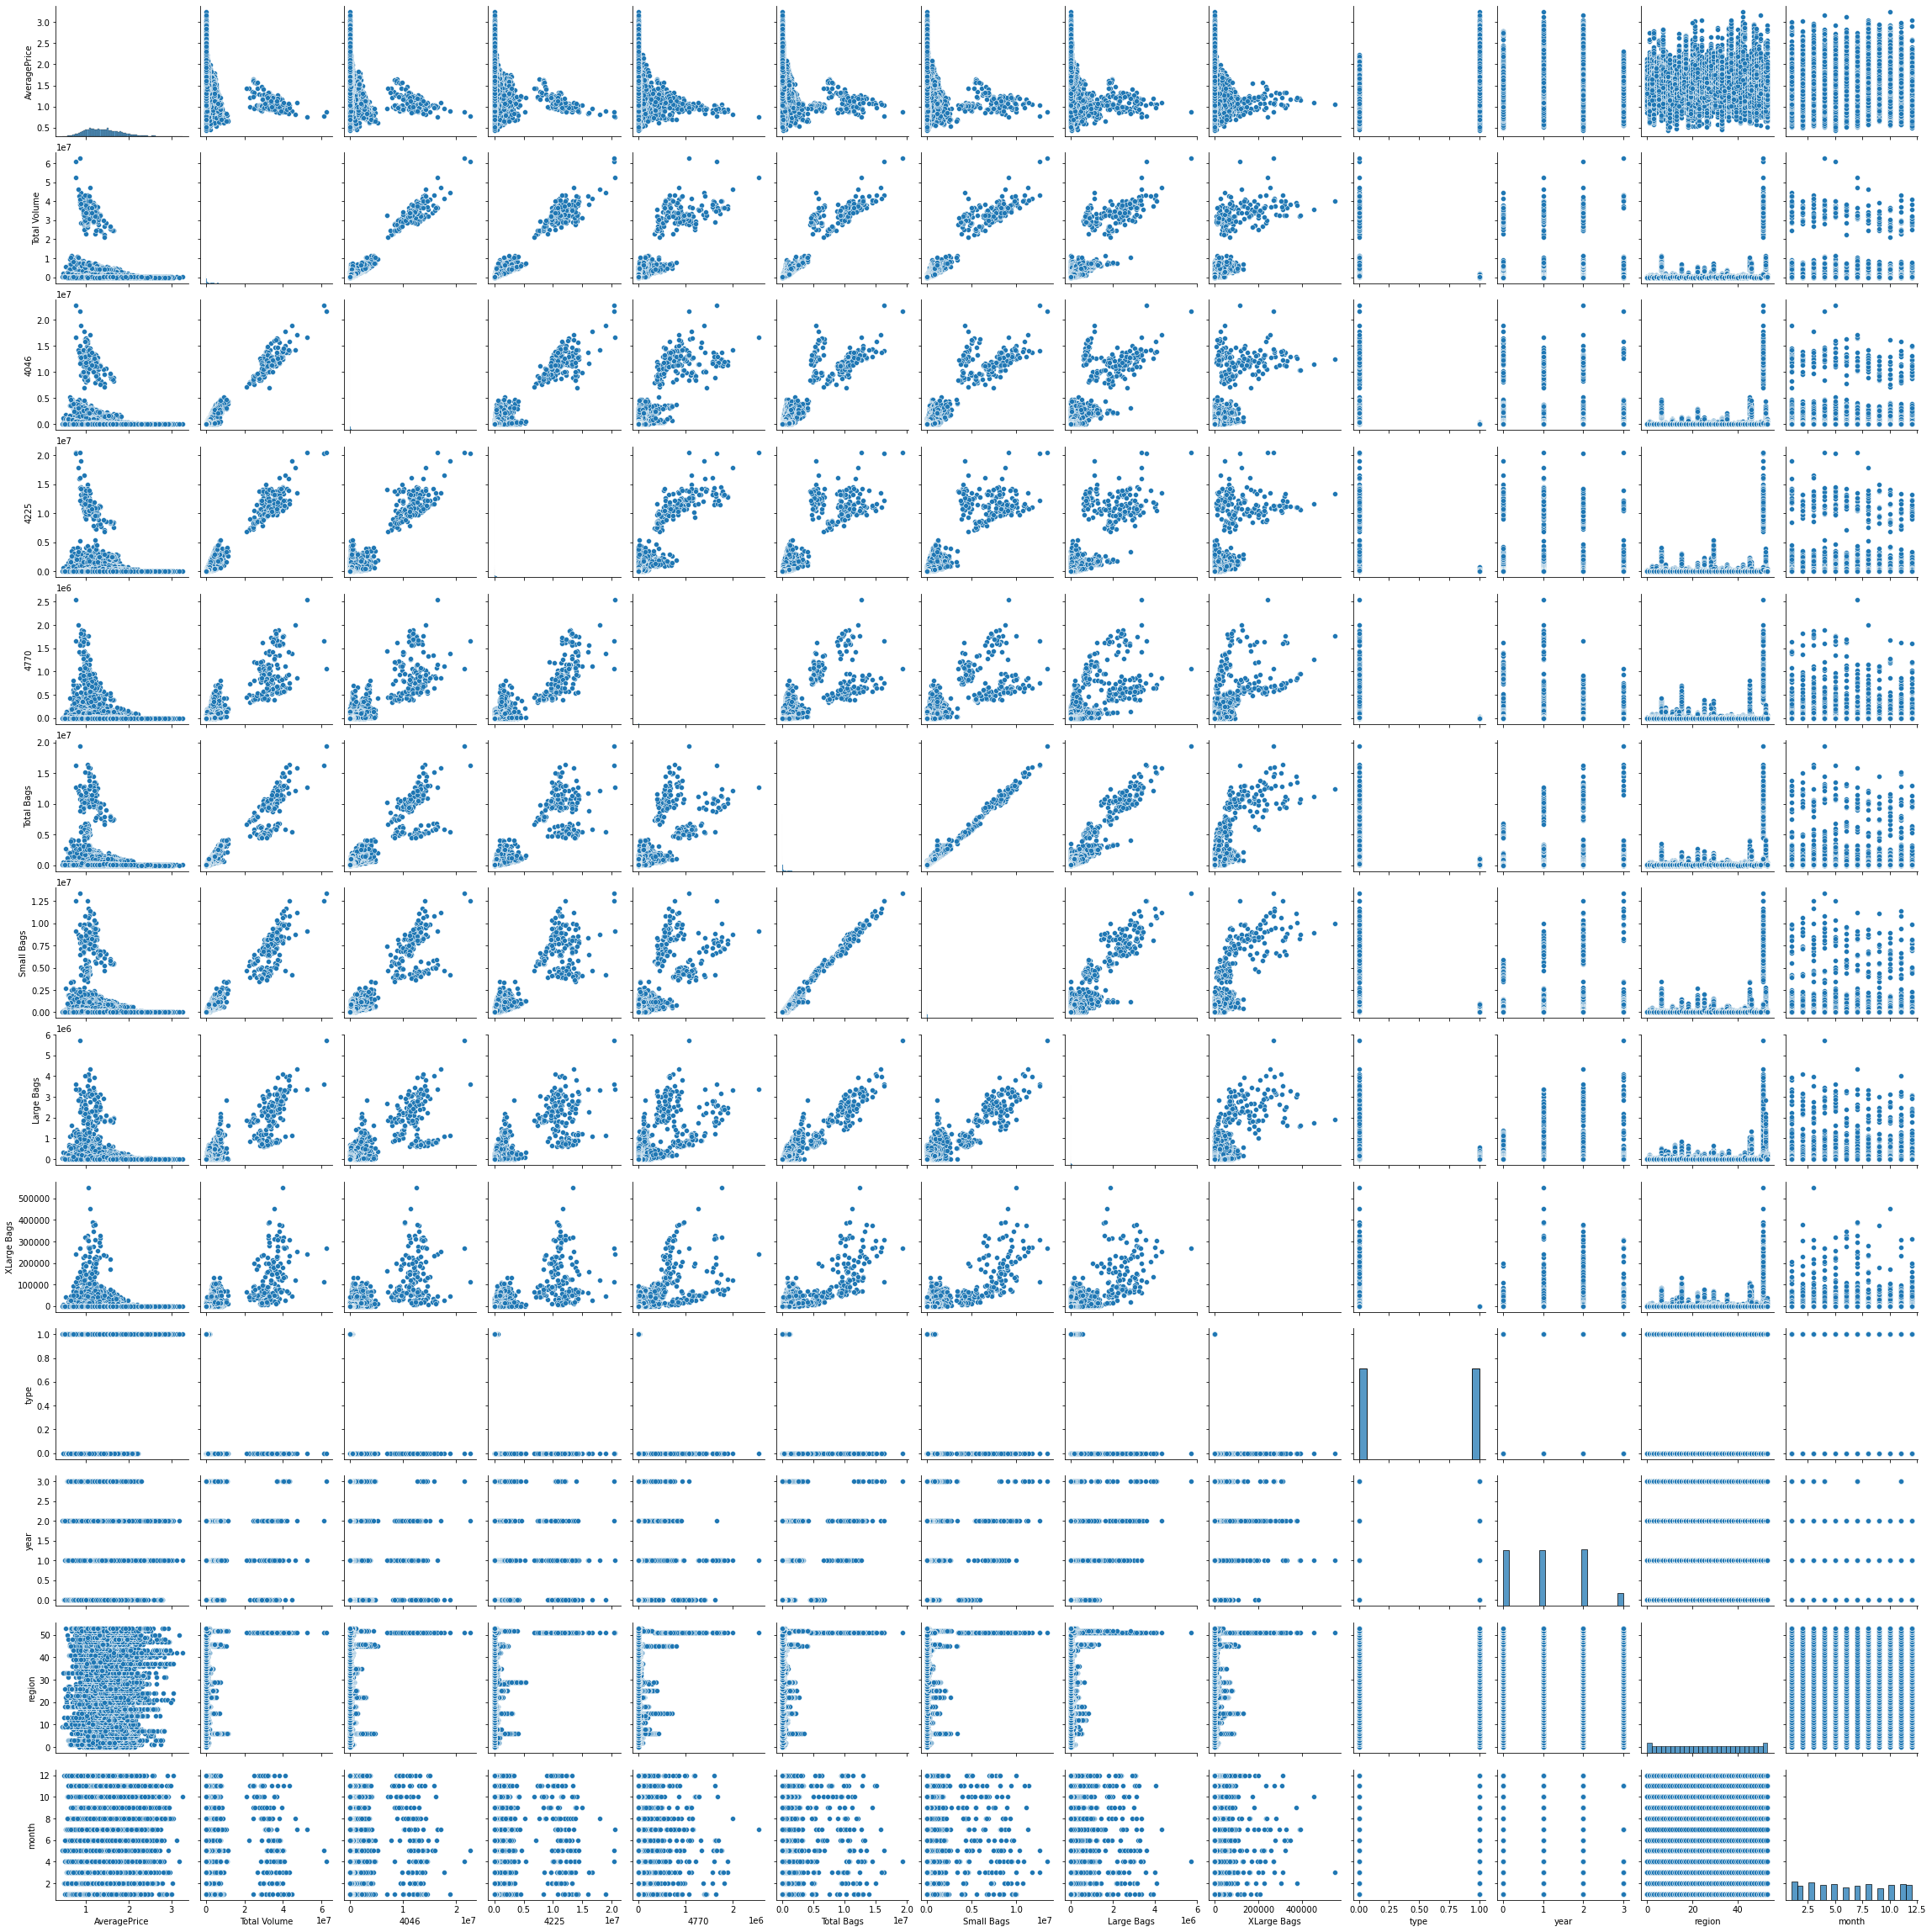

In [36]:
sns.pairplot(df)

here we can see that all dataset are lies in your nature

# describe the datasets:

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


there is a large difference between 75% and maximum for maximum columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

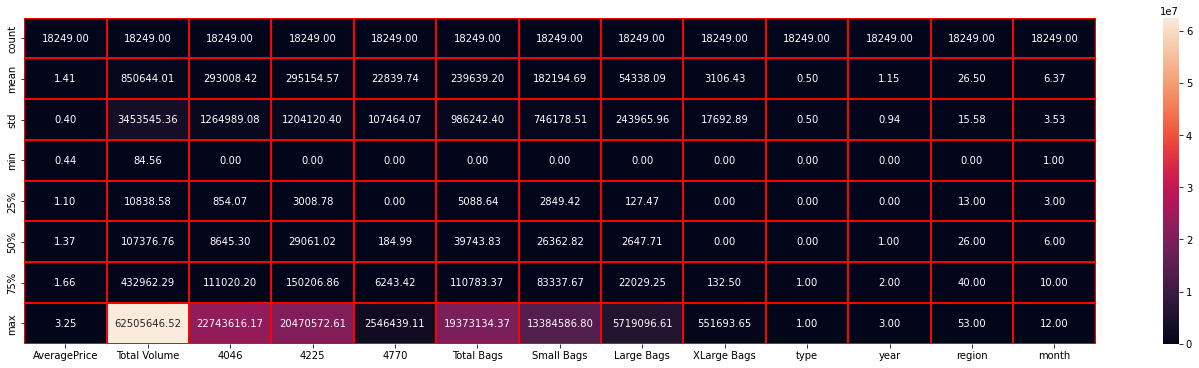

In [38]:
plt.figure(figsize=(24,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [39]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.015344
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014522
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.015892
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.006182
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000017


above figure is the correlation with each other . Lets see its with visualization

<AxesSubplot:>

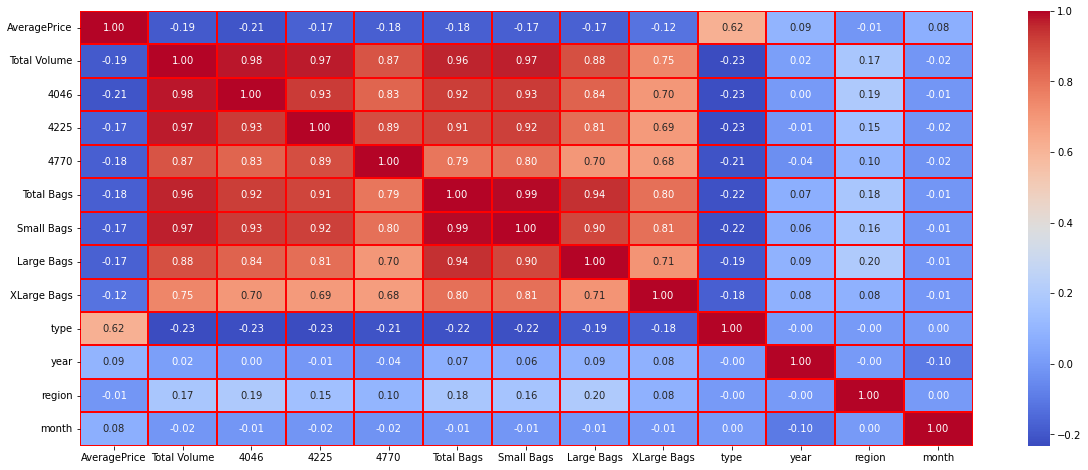

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

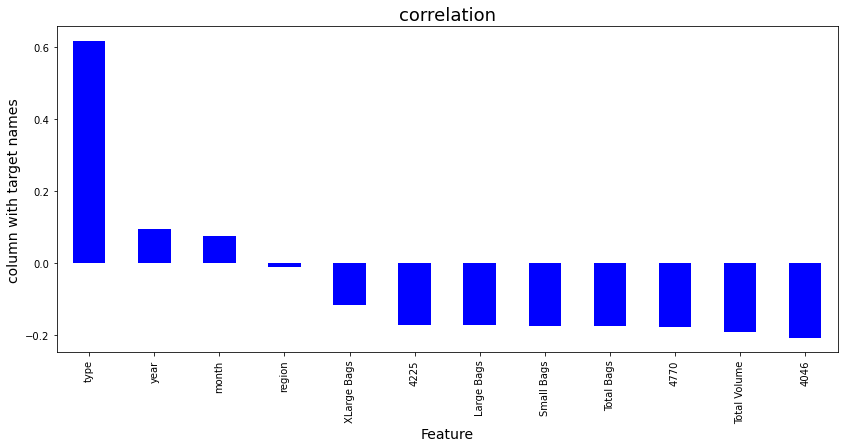

In [41]:
plt.figure(figsize=(14,6))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

maximum columns are negative correlation with the target columns

In [42]:
#Droping some more columns that we don't need

df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

# outliers and Skewness removal:

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
         2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
         2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
         2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
         2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
         2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
         2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
         2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
         2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
         2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
         2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
         2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
         5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
         5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
      

In [44]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,Total Bags,type,year,region,month
0,1.33,64236.62,8696.87,0.0,0.0,0.0,12
1,1.35,54876.98,9505.56,0.0,0.0,0.0,12
2,0.93,118220.22,8145.35,0.0,0.0,0.0,12
3,1.08,78992.15,5811.16,0.0,0.0,0.0,6
4,1.28,51039.60,6183.95,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,3.0,53.0,4
18245,1.71,13888.04,9264.84,1.0,3.0,53.0,1
18246,1.87,13766.76,9394.11,1.0,3.0,53.0,1
18247,1.93,16205.22,10969.54,1.0,3.0,53.0,1


now remove all outliers

In [45]:
df_new.shape

(17931, 7)

In [46]:
df.shape

(18249, 7)

In [47]:
data_loss=((18249-17931)/18249)*100
data_loss

1.7425612362321221

1.74 percentage data loss for removing outliers

In [48]:
x=df_new.drop("AveragePrice",axis=1)
y=df_new["AveragePrice"]
print(x.shape)
print(y.shape)

(17931, 6)
(17931,)


In [49]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [50]:
df_new.skew()

Total Volume   -0.004068
Total Bags     -0.017050
type           -0.005912
year           -0.089245
region         -0.256510
month          -0.159915
dtype: float64

All the values of skewness are in range of -0.5 to +0.5.so finally skewness has been remove successfully

# Let's perform Scaling:

In [51]:
LL

NameError: name 'LL' is not defined

In [52]:
x=df_new  #now new data is convert to x

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [54]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.47420264182778926  at Random State  131


Best accuracy is  0.5001331209179911  at Random State  188

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [56]:
model=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(alpha=0.0001)]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of DecisionTreeRegressor() is: 0.6382482878963017
mean_absolute_error: 0.15322832450515747
mean_squared_error: 0.05375341511011988
Root mean_squared_error: 0.23184782748630595


Accuracy Score of LinearRegression() is: 0.47420264182778926
mean_absolute_error: 0.2196921993316305
mean_squared_error: 0.07812928788442984
Root mean_squared_error: 0.2795161674830811


Accuracy Score of RandomForestRegressor() is: 0.8133259174839798
mean_absolute_error: 0.11595450236966823
mean_squared_error: 0.02773827769724003
Root mean_squared_error: 0.1665481242681527


Accuracy Score of AdaBoostRegressor() is: 0.4977574749946355
mean_absolute_error: 0.2173547843041229
mean_squared_error: 0.07462922780813046
Root mean_squared_error: 0.2731835057395129


Accuracy Score of Lasso(alpha=0.0001) is: 0.4742667188467191
mean_absolute_error: 0.21967601866151562
mean_squared_error: 0.0781197665511996
Root mean_squared_error: 0.2794991351528652




Let's check cross validation

# Cross Validation Model:

In [57]:
model=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(alpha=0.0001)]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for DecisionTreeRegressor() is:  -0.36275801261716617
Score for LinearRegression() is:  0.08115191956336062
Score for RandomForestRegressor() is:  0.060486615775269856
Score for AdaBoostRegressor() is:  -0.02189694007877647
Score for Lasso(alpha=0.0001) is:  0.08129876887792546


With LinearRegression model there is very less difference in accuracy and cross validation score, Hence the best model is LinearRegression.

# Hyper Parameter Training:

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters={"fit_intercept":["True","False"],
           "positive":["True","False"],
           "copy_X":["True","False"],
           "n_jobs":[1,2,3]}

In [60]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [1, 2, 3], 'positive': ['True', 'False']})

In [62]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}

In [63]:
Final_mod= LinearRegression(copy_X="True",fit_intercept="True",n_jobs=1,positive="True")
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

42.46132631447823


After performing GridSearchCV method accuarcy is 43.93%

# saving the best model:

In [64]:
import pickle
filename= 'avacado_regression_model_pred.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [65]:
#load the model from the disk

loaded_model = pickle.load(open('avacado_regression_model_pred.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.4246132631447823


In [66]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586
Predicted,1.587408,1.614475,1.169663,1.163576,1.702361,1.605128,1.685938,1.22895,1.130301,1.186686,...,1.605128,1.626177,1.194807,1.202585,1.603712,1.702361,1.629378,1.603712,1.532205,1.151117
Orginal,1.587408,1.614475,1.169663,1.163576,1.702361,1.605128,1.685938,1.22895,1.130301,1.186686,...,1.605128,1.626177,1.194807,1.202585,1.603712,1.702361,1.629378,1.603712,1.532205,1.151117


In [67]:
#end

# Classification Problem:

In [68]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [69]:
df= pd.read_csv("avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


loaded top 10 datasets

In [70]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,11-03-2018,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,04-03-2018,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,25-02-2018,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,18-02-2018,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,11-02-2018,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


load last 10 datasets

In [71]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

above is the list of all columns

In [72]:
df.shape

(18249, 14)

we have 18249 rows and 14 columns in our datasets

In [73]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

some columns are object type and somes columns are numerical data type

In [75]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

data does not contain any missing values. lets see its with visualization.

<AxesSubplot:>

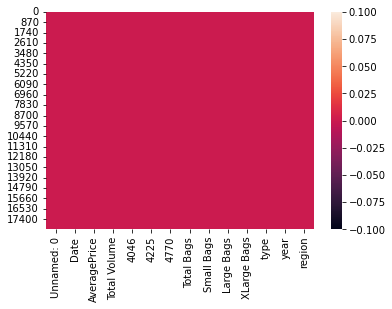

In [76]:
sns.heatmap(df.isnull())

In [77]:
#Let' drop the column which is not required for further analysis
df.drop(columns='Unnamed: 0', inplace =True) 

In [78]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [79]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

no of unique value present in our target columns(region)

In [80]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Better better visuliazation lets change the format of date column.

In [81]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

In [82]:
df['year']=df['Date'].dt.year

In [83]:
df['Date']=df['month'].astype(str)+"-"+df['year'].astype(str)

In [84]:
df["Date"]

0        12-2015
1        12-2015
2        12-2015
3         6-2015
4        11-2015
          ...   
18244     4-2018
18245     1-2018
18246     1-2018
18247     1-2018
18248     7-2018
Name: Date, Length: 18249, dtype: object

In [85]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4
18245,1-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [86]:
#dropping the column Date as it is not required for further analysis 
df.drop(columns='Date', inplace =True)

# Let's do Visualization:

In [87]:
nom_col=[]
for i in df:
    if df.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['type', 'region']


Above is the list of columns which has datatype as object.

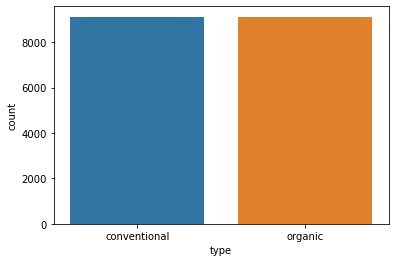

In [88]:
plt.figure()
sns.countplot(df["type"])
plt.show()

above figure is almost same as conventional and organic types

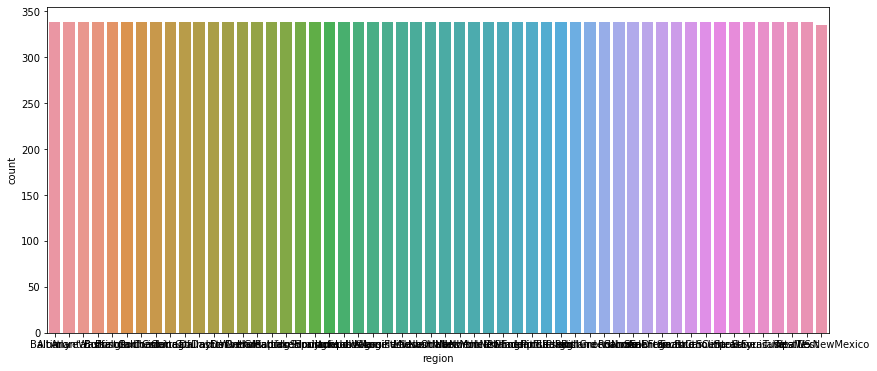

In [89]:
plt.figure(figsize=(14,6))
sns.countplot(df["region"])
plt.show()

list of all regions are same . so no need to apply imbalace technique

<AxesSubplot:xlabel='AveragePrice'>

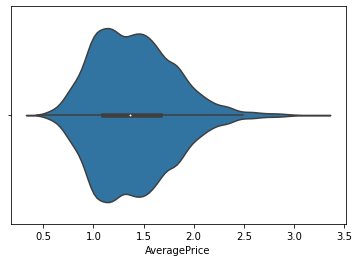

In [90]:
#We can clearly see that the plot is more concentrated towards 1.0 to 2.0

sns.violinplot(df['AveragePrice'])

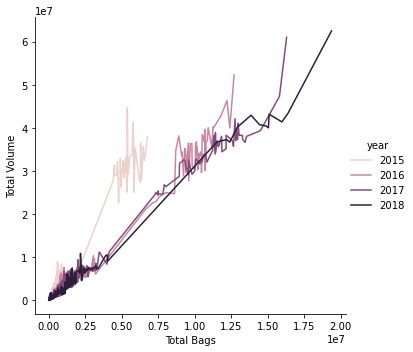

In [91]:
#comparison betwwen total bags vs total volumns
sns.relplot(x='Total Bags',y='Total Volume',hue='year',data=df,kind='line')

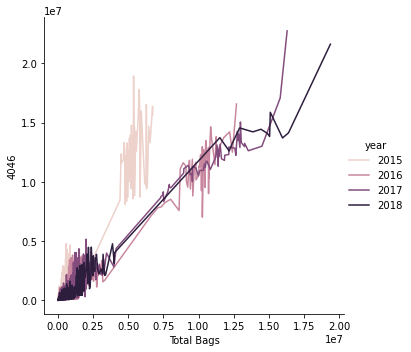

In [92]:
#comparison betwwen total bags vs 4046
sns.relplot(x='Total Bags',y='4046',hue='year',data=df,kind='line')

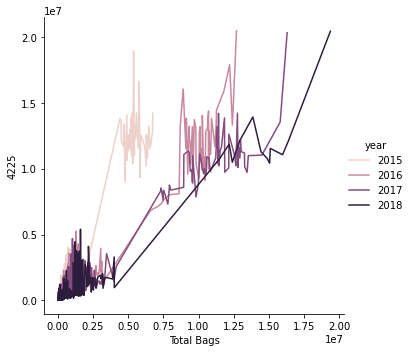

In [93]:
#comparison betwwen total bags vs 4225
sns.relplot(x='Total Bags',y='4225',hue='year',data=df,kind='line')

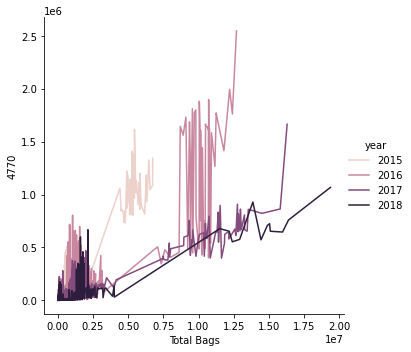

In [94]:
#comparison betwwen total bags vs 4770
sns.relplot(x='Total Bags',y='4770',hue='year',data=df,kind='line')

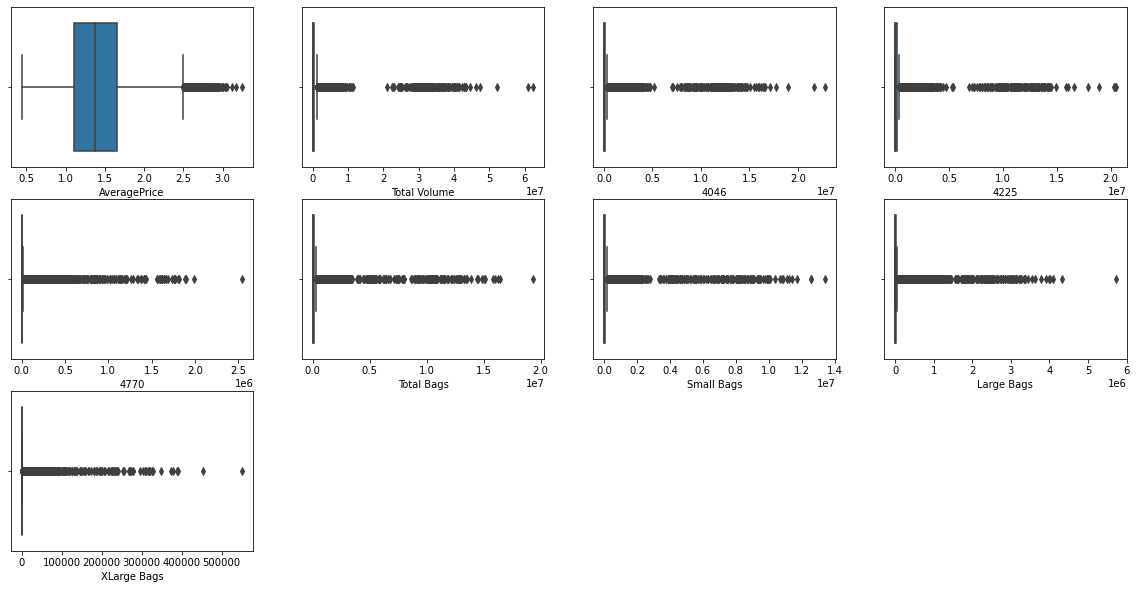

In [95]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i]=='float64':
        plt.subplot(3,4,i+1)
        sns.boxplot(df[df.columns[i]], orient="v")

outliers present in our datasets

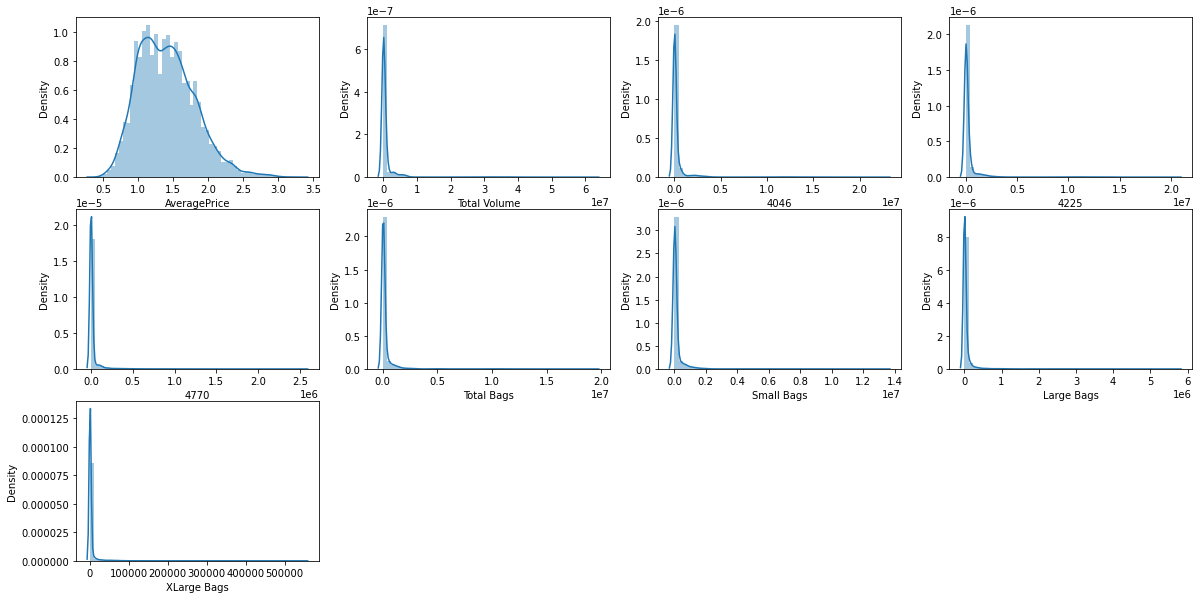

In [96]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i]=='float64':
        plt.subplot(3,4,i+1)
        sns.distplot(df[df.columns[i]])

maximun columns are present in skewness

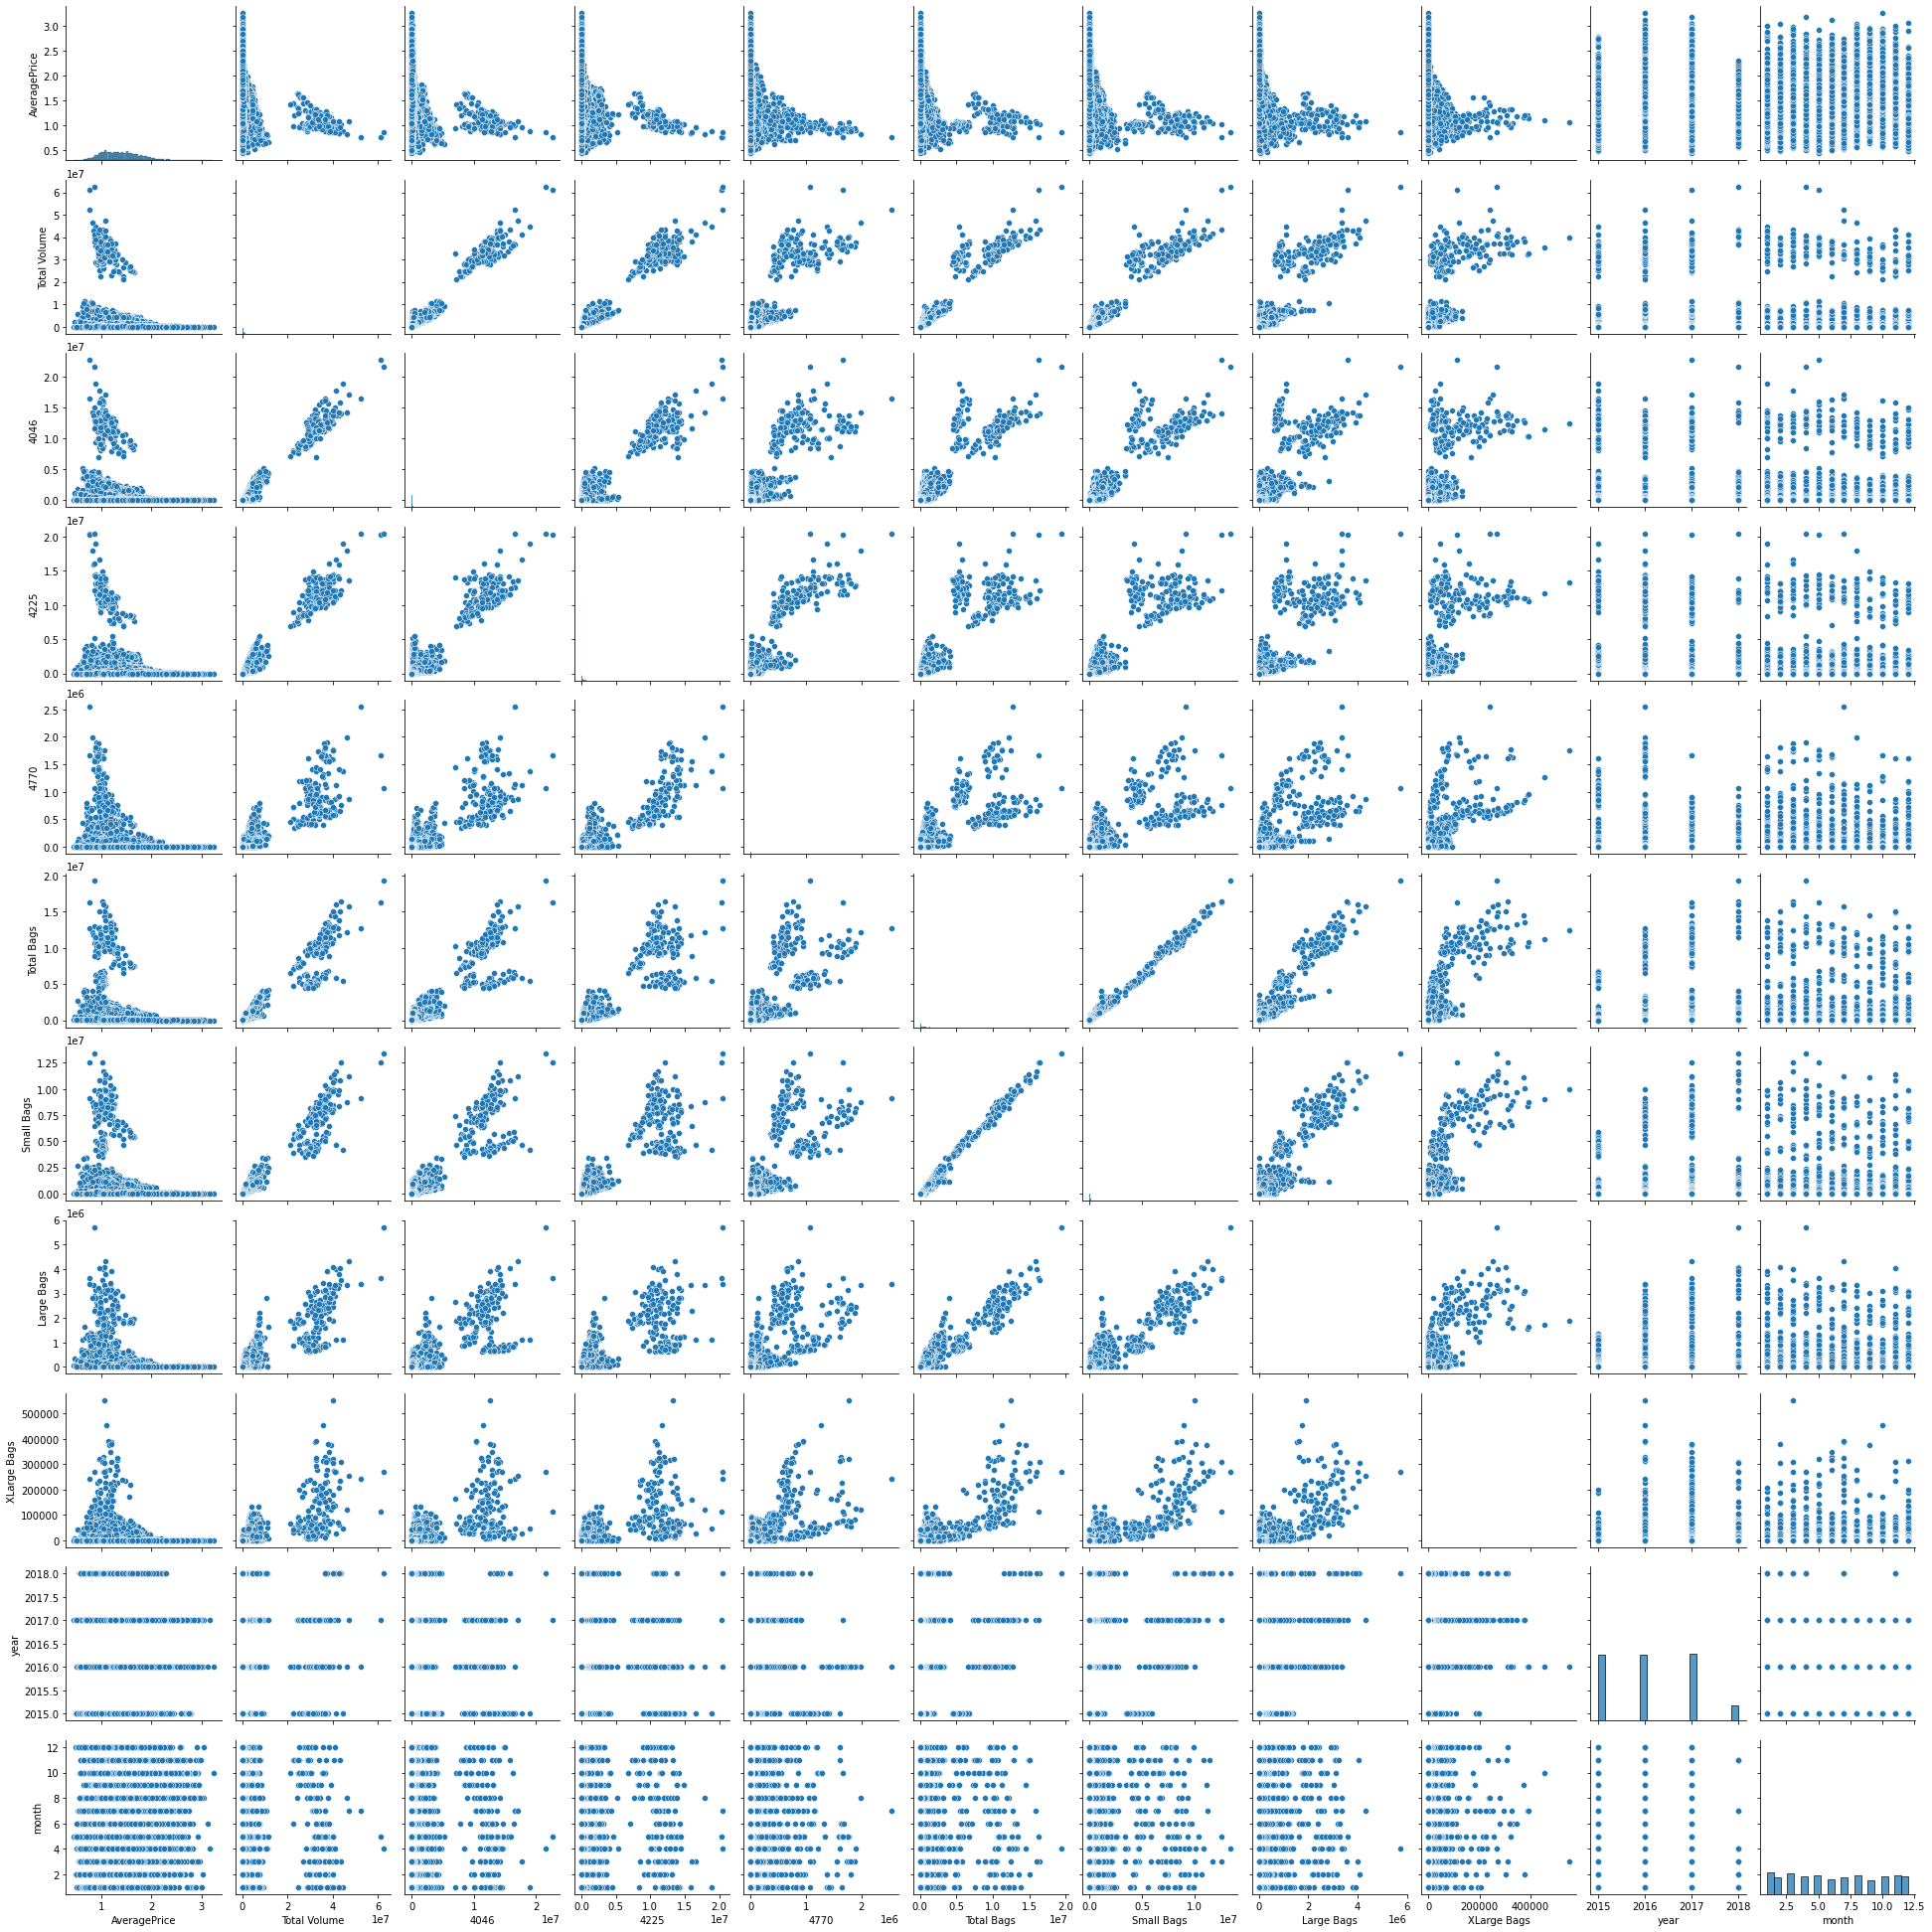

In [98]:
sns.pairplot(df)

we can see that,all datas lies between in your nature

# Encoding:

In [99]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

#data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
#we can perform the above step if we more than one type of avacado's in our data


df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['year']=oe.fit_transform(df['year'].values.reshape(-1,1))

now we have not any categorical types in our data sets

# describe the datasets:

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


there is a large difference between 75% and maximum for maximum columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

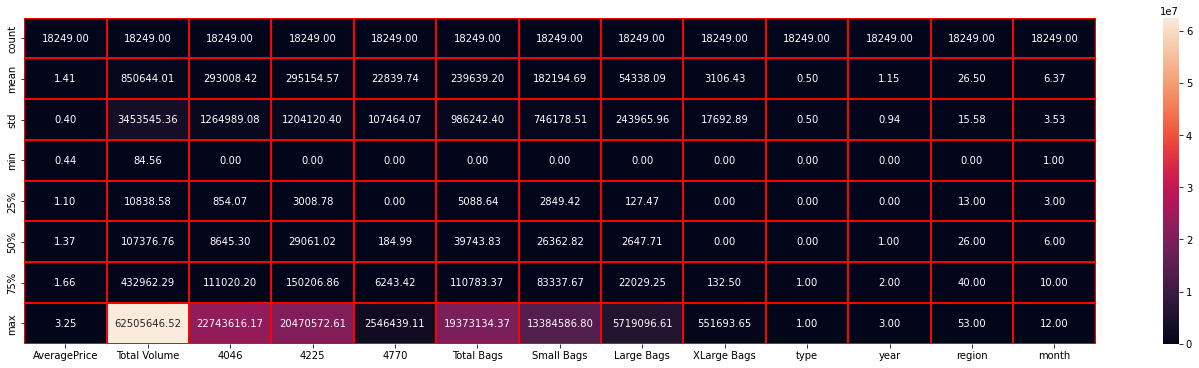

In [101]:
plt.figure(figsize=(24,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [102]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.015344
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014522
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.015892
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.006182
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000017


<AxesSubplot:>

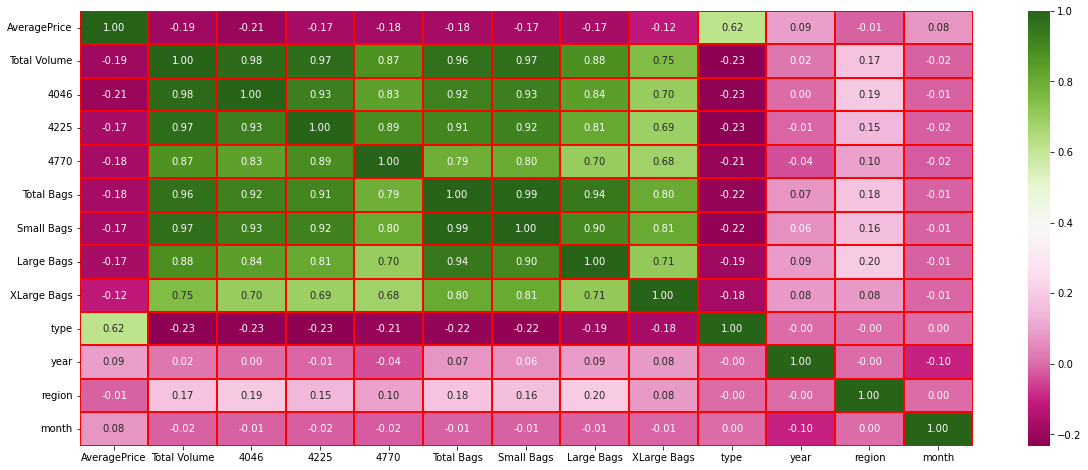

In [103]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="PiYG")

Checking the columns which are positively and negative correlated with the target columns:

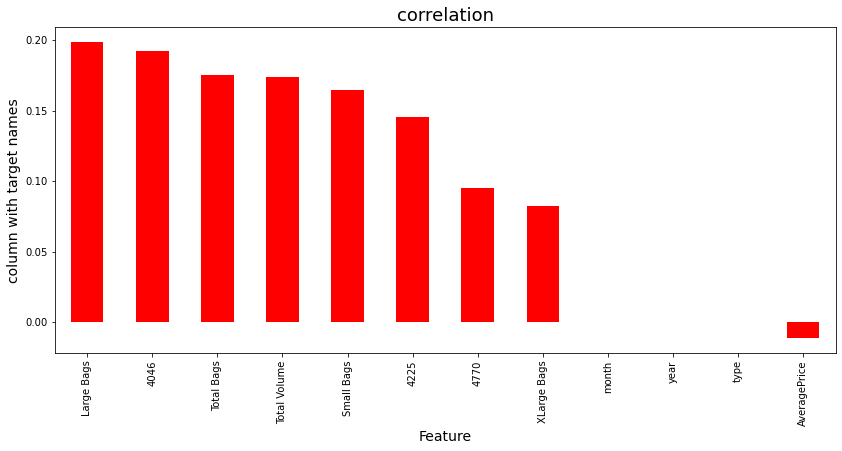

In [104]:
plt.figure(figsize=(14,6))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above fig we can see that, year,month no correlation with each othe so we drop this columns

In [105]:
# drop column 'year' and 'month'
df.drop(['year','month'],axis=1,inplace=True)

# outliers and Skewness removal:

In [106]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [107]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


now remove all outliers

In [108]:
df_new.shape

(17651, 11)

In [109]:
df.shape

(18249, 11)

In [110]:
loss_percentage=((18249-17651)/18249)*100
loss_percentage

3.276891884486821

we have 3.27 percentage data loss for removing outliers

In [111]:
x=df_new.drop("region",axis=1)
y=df_new["region"]
print(x.shape)
print(y.shape)

(17651, 10)
(17651,)


separating x columns and y columns

In [112]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [113]:
df_new.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
dtype: float64

Keeping +/-0.5 as the range for skewness.now skewness allmost remove

# Let's perform Scaling:

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[-0.11782446, -0.07532391, -0.65742071, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -1.04811619,
        -0.67791909,  0.98130886]])

In [115]:
x=df_new

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [117]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8043047295383744  on Random State  82


Best accuracy is  0.8028887000849617  on Random State  82

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [119]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.8043047295383744
[[53  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  1]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  1  0 ...  0 45  0]
 [ 0  2  2 ...  0  0 44]]
              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74        65
         1.0       0.60      0.66      0.63        65
         2.0       0.88      0.87      0.87        67
         3.0       0.77      0.79      0.78        56
         4.0       0.83      0.90      0.86        67
         5.0       0.76      0.75      0.75        71
         6.0       0.94      0.97      0.96        66
         7.0       0.86      0.83      0.84        69
         8.0       0.92      0.86      0.89        65
         9.0       0.82      0.82      0.82        65
        10.0       0.77      0.79      0.78        76
        11.0       0.88      0.91      0.89        78
        12.0       0.82      0.87      0.85        70
        13.0       0.

Lets check crossvalidation for better accuracy

# Cross Validation:

In [120]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.5505680885527858
Score for  SVC()  is :  0.6051773406405266
Score for  KNeighborsClassifier()  is :  0.5944133506305543
Score for  RandomForestClassifier()  is :  0.6650077380193077


With SVC model there is very less difference in accuracy and cross validation score, Hence the best model is SVC.

# Hyperparameter Training:

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
parameters ={"C":[0.1,1,10],
            "kernel":["rbf","poly","sigmoid"],
            "gamma":["scale","auto"],
            "max_iter":[-1,1,2]}

In [123]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [124]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'max_iter': [-1, 1, 2]})

In [125]:
GCV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1}

In [126]:
Final_mod= SVC(C=10,gamma="scale",kernel="rbf",max_iter=-1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.24497309544039


After hyperparamete tuning,our accuracy has been improve.we are getting 85.24% accuracy

# Saving the best Model:

In [127]:
import pickle
filename= 'avacado_classification_model_pred.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [128]:
#load the model from the disk

loaded_model = pickle.load(open('avacado_classification_model_pred.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8524497309544039


In [129]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530
Predicted,46.0,37.0,23.0,46.0,4.0,51.0,27.0,22.0,36.0,33.0,...,28.0,0.0,27.0,13.0,11.0,8.0,48.0,36.0,41.0,25.0
Orginal,46.0,37.0,23.0,46.0,4.0,51.0,27.0,22.0,36.0,33.0,...,28.0,0.0,27.0,13.0,11.0,8.0,48.0,36.0,41.0,25.0


In [130]:
#end